In [1]:
import pandas as pd
dataset = pd.read_csv("Tatacoffee13_21.csv",parse_dates=['Date'],index_col='Date')
dataset

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [2]:
from datetime import date, timedelta
import pandas as pd
start_date = pd.to_datetime("2013-01-01")
end_date = pd.to_datetime("2019-02-04") - timedelta(days = 1)
all_date = pd.date_range(start_date, end_date, freq='d')
all_date

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03'],
              dtype='datetime64[ns]', length=2225, freq='D')

In [3]:
dummyDate=dataset
dummyDate.index = all_date
dummyDate

,Open,High,Low,Close
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-05,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2019-01-30,202.90,207.80,201.35,205.00
2019-01-31,206.00,206.85,202.05,202.95
2019-02-01,203.90,203.90,199.35,201.00
2019-02-02,200.00,222.00,196.00,218.35


In [4]:
dummyDate.to_csv("Ts-OHLC.csv",index=False)

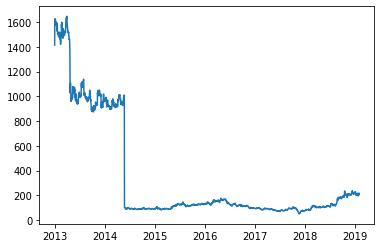

In [4]:
import matplotlib.pyplot as plt
plt.plot(dataset["Close"])

<Figure size 1152x360 with 0 Axes>

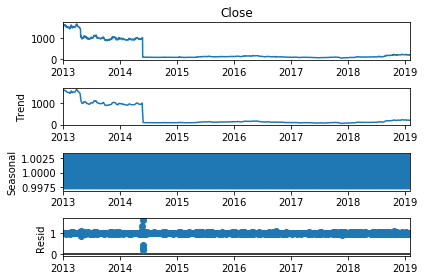

In [5]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1152x360 with 0 Axes>

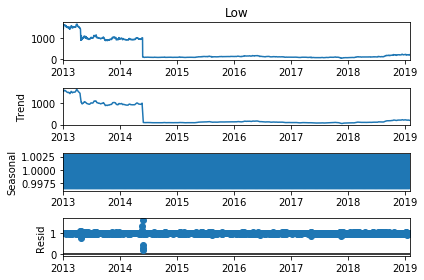

In [6]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Low"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1152x360 with 0 Axes>

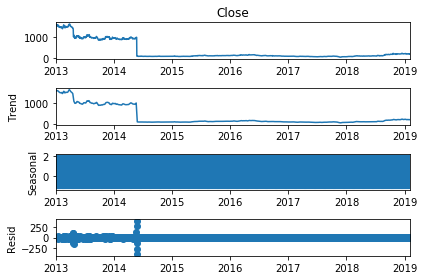

In [7]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1152x360 with 0 Axes>

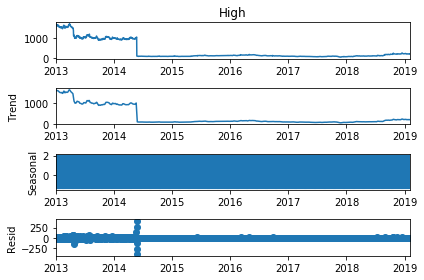

In [8]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["High"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1152x360 with 0 Axes>

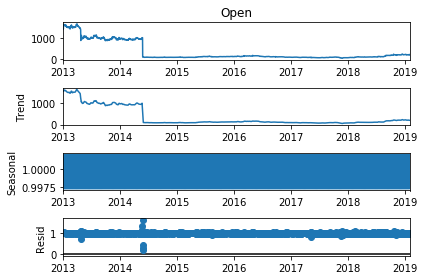

In [9]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Open"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

In [10]:
# import library need for Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

In [11]:
# only taking Close columns 
timeseries = dataset["Close"]
# ADF Test
dftest = adfuller(timeseries, autolag='AIC')
dftest

(-3.007236327367318,
 0.034224122290930005,
 1,
 2223,
 {'1%': -3.433295059438173,
  '5%': -2.8628410403669844,
  '10%': -2.5674626062113077},
 19813.538287196585)

In [12]:
dftest[0:4]

(-3.007236327367318, 0.034224122290930005, 1, 2223)

In [13]:
# name the index get form ADF test and create dataframe 
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

In [14]:
dfoutput

Test Statistic                   -3.007236
p-value                           0.034224
#Lags Used                        1.000000
Number of Observations Used    2223.000000
dtype: float64

In [15]:
dftest[4]

{'1%': -3.433295059438173,
 '5%': -2.8628410403669844,
 '10%': -2.5674626062113077}

In [16]:
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

In [17]:
print (dfoutput)

Test Statistic                   -3.007236
p-value                           0.034224
#Lags Used                        1.000000
Number of Observations Used    2223.000000
Critical Value (1%)              -3.433295
Critical Value (5%)              -2.862841
Critical Value (10%)             -2.567463
dtype: float64


In [18]:
ans=dfoutput

In [19]:
ans

Test Statistic                   -3.007236
p-value                           0.034224
#Lags Used                        1.000000
Number of Observations Used    2223.000000
Critical Value (1%)              -3.433295
Critical Value (5%)              -2.862841
Critical Value (10%)             -2.567463
dtype: float64

In [20]:
# hypothesis testing 
if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
    print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
    print("Reject null hypothesis:Non Stationarity")
    print("Accept Alternate hypothesis:Staionarity ")
    message="Stationarity based on ADH"
else:
    print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
    print("Accept null hypothesis:Non Stationarity" )
    print("Reject Alternate hypothesis:Staionarity ")
    message="Non-stationarity based on ADH"

Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Reject null hypothesis:Non Stationarity
Accept Alternate hypothesis:Staionarity 


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional in

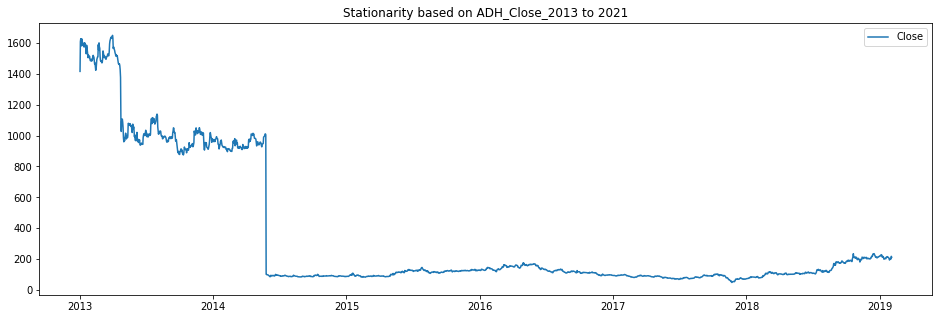

In [21]:
# plot
plt.figure(figsize=(16,5))
pollutant = "Close"
plt.plot(dataset.index, dataset[pollutant], label = pollutant)
plt.legend(loc='best')
plt.title("{}_{}_2013 to 2021".format(message,pollutant))
plt.savefig("{}_ADH.png".format(pollutant))
plt.show()

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


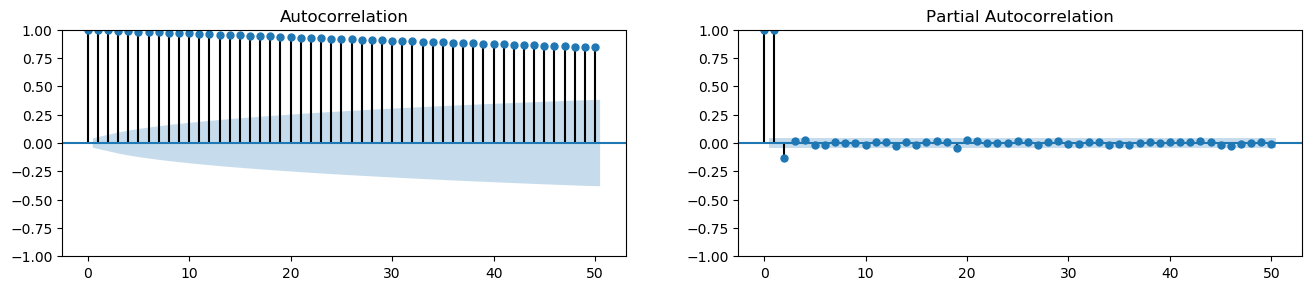

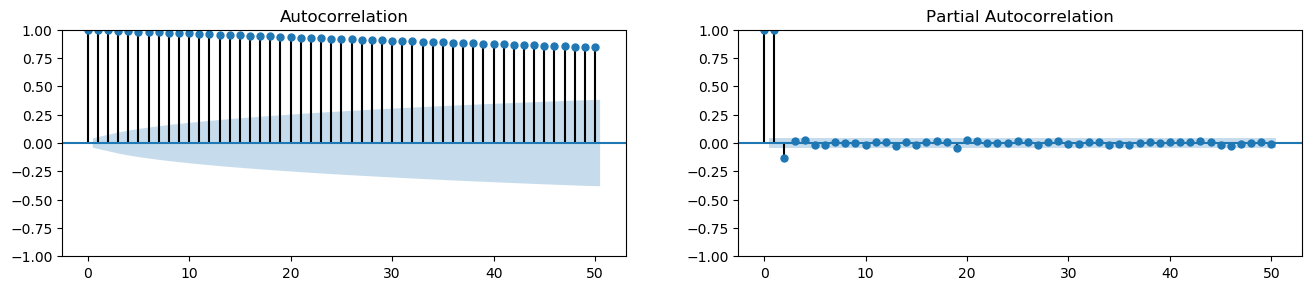

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataset.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(dataset.Close.tolist(), lags=50, ax=axes[1])

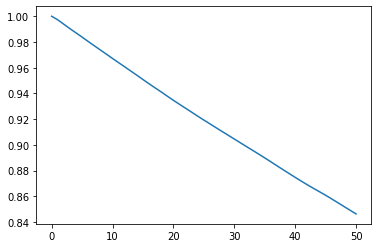

In [23]:
plt.plot(acf(dataset["Close"],nlags=50))

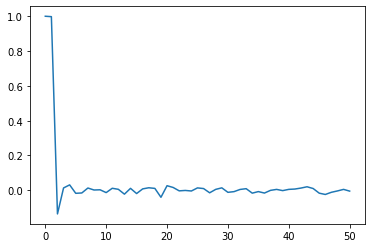

In [24]:
plt.plot(pacf(dataset["Close"],nlags=50))

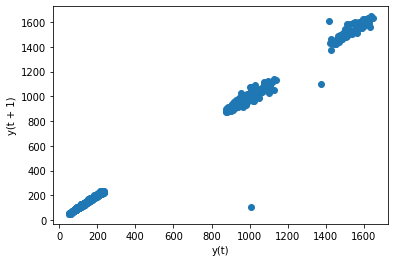

In [25]:
from pandas.plotting import lag_plot
lag_plot(dataset["Close"],lag=1)

In [26]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [27]:
import numpy as np
print(ApEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))  

0.027409184525792107


In [28]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [29]:
print(SampEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))

0.007918086989927514
